In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# function to parse through the data
def parse_csv(file_name: str):
    data = pd.read_csv(file_name)
    e = np.array([])
    N = np.array([])
    for i in range(50):
        e = np.append(e, data.e.iloc[i])
        N = np.append(N, data.N.iloc[i])
    return e, N

# function to plot the figure 
def plot(x, y, title, xlabel='e: the tolerated error', ylabel='N: timestep till random'):
    plt.ion()
    plt.figure()
    plt.plot(x, y, 'o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# compute the Mean square error of this fit 
def calculate_mse(f, a, b, xdata, ydata):
    mse = 0
    for i in range(len(xdata)):
        mse += (ydata[i] - f(xdata[i], a, b))**2
    mse = mse / len(xdata)
    return mse


# create a function to fit the data to a specific kind of function
def fit(f,x,y):
    # fit the data
    params, cov = curve_fit(f=f, xdata=x, ydata=y, p0=[1,1], bounds=(-np.inf, np.inf))
    std_deviation = np.sqrt(np.diag(cov))
    print('the parameter a, b are: ', params)
    print('the standard deviation of a, b are: ', std_deviation)
    # print('the covariance matrix of a, b is: ')
    # print(cov)

    # plot the fit
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, f(x, params[0], params[1]), label='fit')
    plt.legend()

    # calculate the mean square error
    mse = calculate_mse(f, params[0], params[1],x,y)
    print('the mean square error is: ', mse)
    
# the inverse function 
def inverse(x, a, b):
    return a / x**b  # y = (a/x^b)

# the logarithm function
def logfunction(x, a, b):
    return a * np.log(x) + b # y = alogx+b

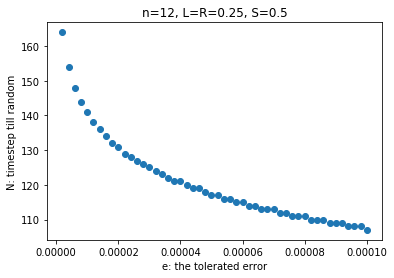

the parameter a, b are:  [39.05974019  0.11091396]
the standard deviation of a, b are:  [0.41756649 0.00102815]
the mean square error is:  0.7547455122355424


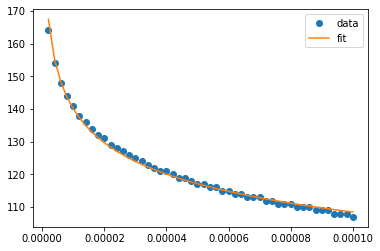

In [54]:
e1, N1 = parse_csv("matlab_sim/data_e_N_1.csv")
plot(e1, N1, title='n=12, L=R=0.25, S=0.5')
fit(inverse, e1, N1)

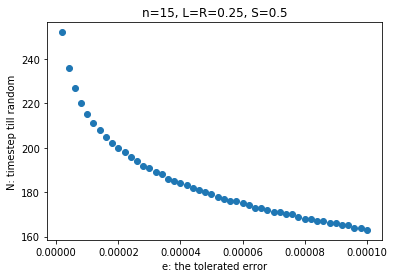

the parameter a, b are:  [58.09940071  0.11337626]
the standard deviation of a, b are:  [0.63741538 0.00105461]
the mean square error is:  1.8589540384652268


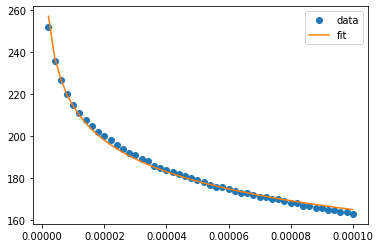

In [55]:
e2, N2 = parse_csv("matlab_sim/data_e_N_2.csv")
plot(e2, N2, title='n=15, L=R=0.25, S=0.5')
fit(inverse, e2, N2)

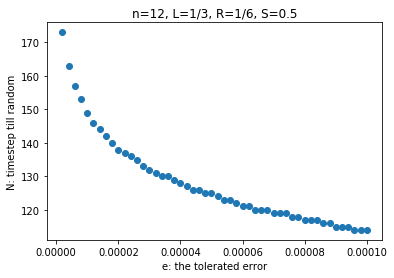

the parameter a, b are:  [41.6215044   0.11035368]
the standard deviation of a, b are:  [0.47997624 0.0011092 ]
the mean square error is:  0.9847154549340058


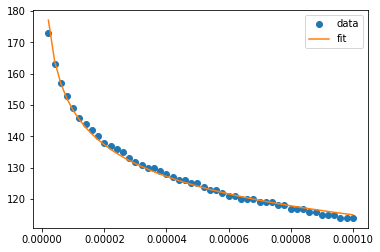

In [56]:
e3, N3 = parse_csv("matlab_sim/data_e_N_3.csv")
plot(e3, N3, title='n=12, L=1/3, R=1/6, S=0.5')
fit(inverse, e3, N3)

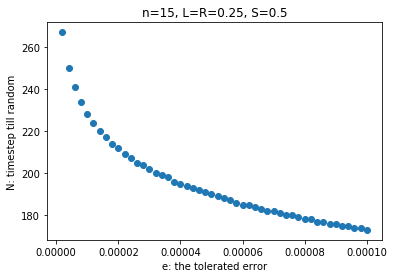

the parameter a, b are:  [61.63683091  0.11329538]
the standard deviation of a, b are:  [0.65388454 0.00101979]
the mean square error is:  1.9526980597630506


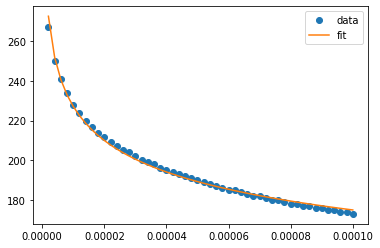

In [57]:
e4, N4 = parse_csv("matlab_sim/data_e_N_4.csv")
plot(e4, N4, title='n=15, L=R=0.25, S=0.5')
fit(inverse, e4, N4)

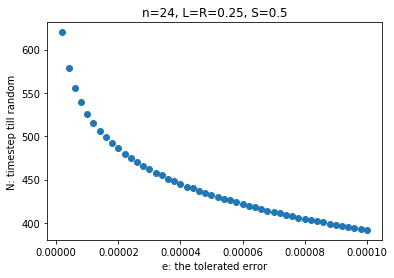

the parameter a, b are:  [1.31266996e+02 1.20063940e-01]
the standard deviation of a, b are:  [1.57018589e+00 1.14826442e-03]
the mean square error is:  13.113477373915917


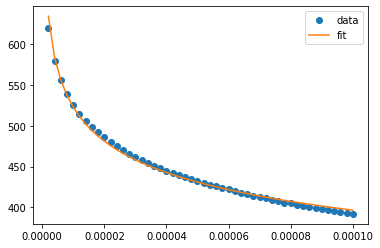

In [4]:
e5, N5 = parse_csv("matlab_sim/data_e_N_5.csv")
plot(e5, N5, title='n=24, L=R=0.25, S=0.5')
fit(inverse, e5, N5)

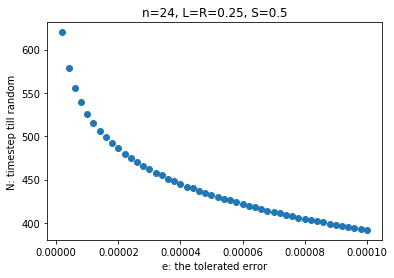

the parameter a, b are:  [ -58.25917551 -144.73422539]
the standard deviation of a, b are:  [0.04535474 0.46220527]
the mean square error is:  0.07650178417326979


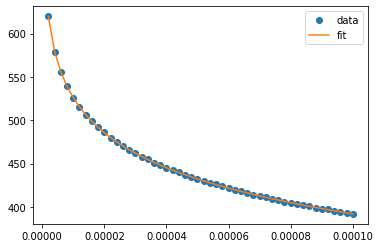

In [5]:
e5, N5 = parse_csv("matlab_sim/data_e_N_5.csv")
plot(e5, N5, title='n=24, L=R=0.25, S=0.5')
fit(logfunction, e5, N5)

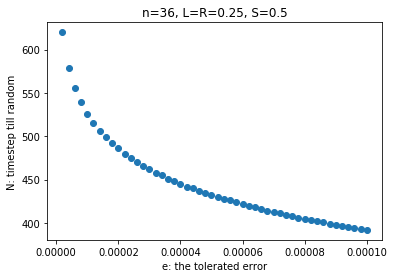

the parameter a, b are:  [1.31266996e+02 1.20063940e-01]
the standard deviation of a, b are:  [1.57018589e+00 1.14826442e-03]
the mean square error is:  13.113477373915917


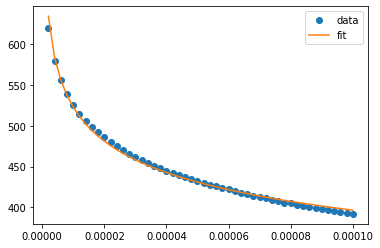

In [6]:
e6, N6 = parse_csv("matlab_sim/data_e_N_6.csv")
plot(e6, N6, title='n=36, L=R=0.25, S=0.5')
fit(inverse, e6, N6)

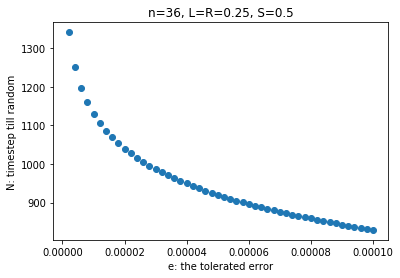

the parameter a, b are:  [-131.09130582 -378.10486345]
the standard deviation of a, b are:  [0.04277764 0.43594231]
the mean square error is:  0.06805498051761202


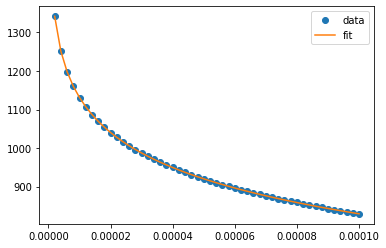

In [8]:
e6, N6 = parse_csv("matlab_sim/data_e_N_6.csv")
plot(e6, N6, title='n=36, L=R=0.25, S=0.5')
fit(logfunction, e6, N6)

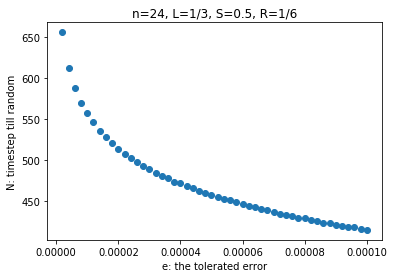

the parameter a, b are:  [1.39260759e+02 1.19864845e-01]
the standard deviation of a, b are:  [1.66222773e+00 1.14584559e-03]
the mean square error is:  14.6301983168886


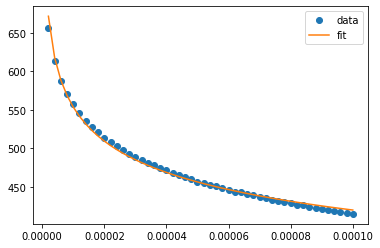

In [9]:
e7, N7 = parse_csv("matlab_sim/data_e_N_7.csv")
plot(e7, N7, title='n=24, L=1/3, S=0.5, R=1/6')
fit(inverse, e7, N7)

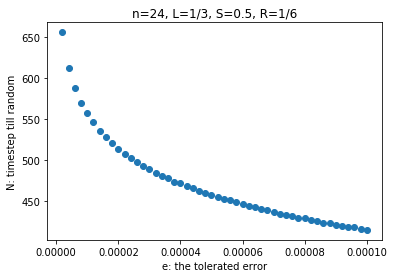

the parameter a, b are:  [ -61.5695816  -152.10414299]
the standard deviation of a, b are:  [0.05393543 0.54965022]
the mean square error is:  0.10818690242012989


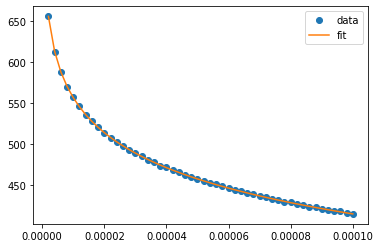

In [10]:
e7, N7 = parse_csv("matlab_sim/data_e_N_7.csv")
plot(e7, N7, title='n=24, L=1/3, S=0.5, R=1/6')
fit(logfunction, e7, N7)

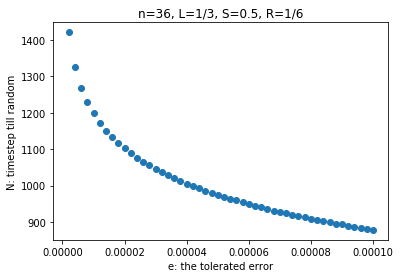

the parameter a, b are:  [2.78555913e+02 1.26138981e-01]
the standard deviation of a, b are:  [3.71227232e+00 1.27769369e-03]
the mean square error is:  84.04319139384376


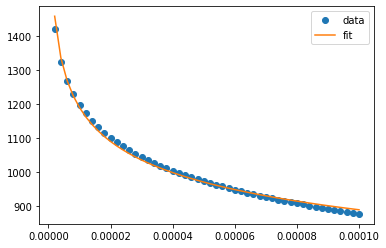

In [11]:
e8, N8 = parse_csv("matlab_sim/data_e_N_8.csv")
plot(e8, N8, title='n=36, L=1/3, S=0.5, R=1/6')
fit(inverse, e8, N8)

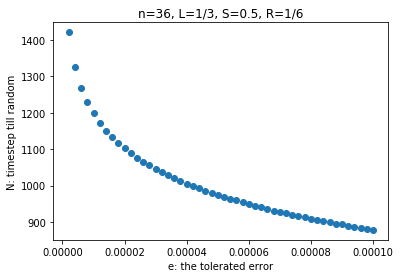

the parameter a, b are:  [-138.90313936 -401.27690989]
the standard deviation of a, b are:  [0.05667475 0.57756631]
the mean square error is:  0.11945534126800599


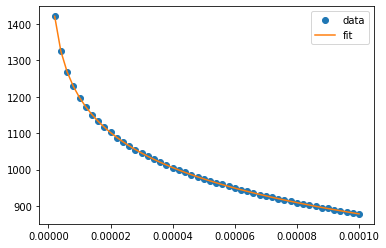

In [12]:
e8, N8 = parse_csv("matlab_sim/data_e_N_8.csv")
plot(e8, N8, title='n=36, L=1/3, S=0.5, R=1/6')
fit(logfunction, e8, N8)